In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Matplotlib

For this excercise, we have written the following code to load the stock dataset built into plotly express.

In [4]:
stocks = px.data.stocks()
stocks.head()
#stocks.info()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Question 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

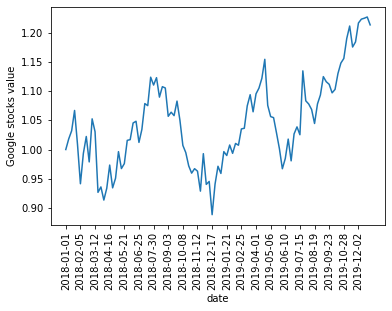

In [5]:
sns.lineplot(x='date', y='GOOG', data=stocks)
plt.xticks((np.arange(0,105, step=5)), rotation=90)
plt.ylabel('Google stocks value')
plt.show()

## Question 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

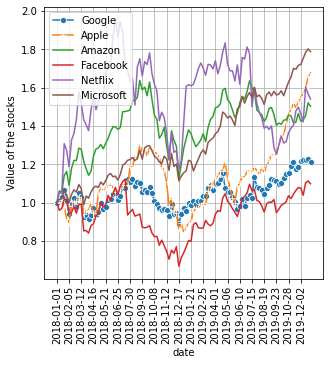

In [12]:
plt.figure(figsize=(5,5))
sns.lineplot(x='date', y='GOOG', data=stocks, label='Google', marker = 'o')
sns.lineplot(x='date', y='AAPL', data=stocks, label='Apple', marker= '+')
sns.lineplot(x='date', y='AMZN', data=stocks, label='Amazon' )
sns.lineplot(x='date', y='FB', data=stocks, label='Facebook' )
sns.lineplot(x='date', y='NFLX', data=stocks, label='Netflix' )
sns.lineplot(x='date', y='MSFT', data=stocks, label='Microsoft' )
plt.ylabel('Value of the stocks')
plt.grid()
plt.xticks((np.arange(0,105, step=5)), rotation=90)
plt.show()

# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [13]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 3:

Let's explore this dataset. Pose a question and create a plot that support drawing answers for your question.

Some possible questions:
- Are there differences between male and female when it comes to giving tips?
- What attribute correlate the most with tip?

Are tips higher during dinner compared to lunch?


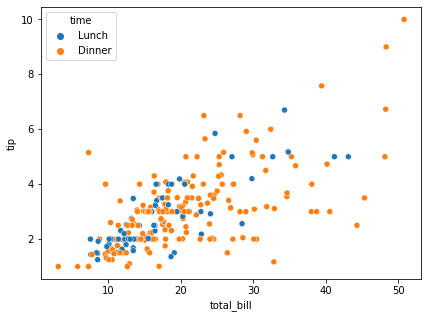

In [7]:
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(nrows=1, ncols=2)

print('Are tips higher during dinner compared to lunch?')
ax = fig.add_subplot(gs[0,0])
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time')

# bx = fig.add_subplot(gs[0,1])
# sns.scatterplot(x='total_bill', y='tip', data=tips, hue = 'smoker')

plt.show()

# Plotly Express

## Question 4:

Redo the above exercises (challenges 2 & 3) with plotly express. Create diagrams which you can interact with.

### The stocks dataset

*Hints*:
- Turn stocks dataframe into a structure that can be picked up easily with plotly express

In [17]:
df = px.data.stocks()

fig = px.line(df, x='date', y=df.columns[1:7], markers=True)
fig.show()

### The tips dataset

In [19]:
fig1 = px.scatter(tips, x='total_bill', y='tip', color='sex',facet_row='time', facet_col = 'smoker')
fig1.show()

print('Do smokers leave more tips at lunch or at dinner?')

Do smokers leave more tips at lunch or at dinner?


## Question 5:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

In [20]:
#load data
ef = px.data.gapminder()
ef.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [30]:
ef_2007 = ef.query('year==2007')

ef_2007_new = ef_2007.groupby('continent').sum().sort_values('pop', ascending=True)
fig=px.bar(ef_2007_new, x='pop', y=ef_2007_new.index, color=['Oceania', 'Europe', 'Americas', 'Africa', 'Asia'],  text_auto=True)

fig.show()